# 20장 전이 학습을 통해 딥러닝의 성능 극대화하기
20-1 치매 환자의 뇌인지 일반인의 뇌인지 예측하기

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

***학습셋 데이터 읽어오기 & 부풀리기***

**ImageDataGenerator**
* 주어진 데이터를 이용해 변형된 이미지를 만들어 학습셋에 포함시킴
* 데이터의 수 확장시 효과적으로 사용

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       '/content/drive/My Drive/run_project/train',   
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.


***테스트셋***
* 실제 정보를 그대로 유지하게 하는 편이 과적합의 위험을 줄일 수 있으므로 부풀리기를 하지 않음



In [4]:
#테스트 셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       '/content/drive/My Drive/run_project/test',   
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 120 images belonging to 2 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 73s 726ms/step - loss: 0.6926 - accuracy: 0.5220 - val_loss: 0.6886 - val_accuracy: 0.4800
Epoch 2/20
100/100 [==============================] - 40s 399ms/step - loss: 0.6857 - accuracy: 0.5620 - val_loss: 0.6840 - val_accuracy: 0.5600
Epoch 3/20
100/100 [==============================] - 20s 195ms/step - loss: 0.6464 - accuracy: 0.6600 - val_loss: 0.5343 - val_accuracy: 0.7800
Epoch 4/20
100/100 [==============================] - 17s 168ms/step - loss: 0.5738 - accuracy: 0.7400 - val_loss: 0.5227 - val_accuracy: 0.6800
Epoch 5/20
100/100 [==============================] - 17s 168ms/step - loss: 0.4954 - accuracy: 0.7720 - val_loss: 0.3570 - val_accuracy: 0.7800
Epoch 6/20
100/100 [==============================] - 17s 169ms/step - loss: 0.4305 - accuracy: 0.8180 - val_loss: 0.3153 - val_accuracy: 0.8400
Epoch 7/20
100/100 [==============================] - 

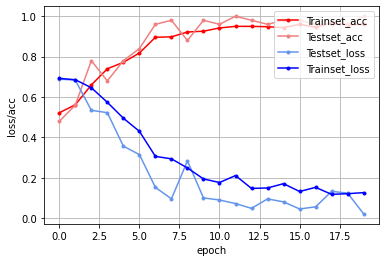

In [5]:
# 앞서 배운 CNN 모델을 만들어 적용해 만들기
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

#모델을 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행
history = model.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
